In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via nearest neighbors
#

## Here's our _one-cell_ version of the ML workflow <font color="Coral"><b>let's start here</b></font> &nbsp;&nbsp; <font size="-2">"amoeba version," maybe</font>

This is for iris classification.  You'll run ML on the births and digits!


### <b>Data reminder</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

### Iris classification via Nearest Neighbors

+ Section 1: Libraries
+ Section 2: Read the already-cleaned data  (+ view, if you wish)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" value of k, best_k
+ Section 11:  Let's build a final model + and see it!

In [ ]:
# Section 1:  Libraries
#
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
from sklearn.neighbors import KNeighborsClassifier
k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a knn classifier with k =", k)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total:5.2f}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
for k in range(1,85):    # Note that we are cross-validating using only our TRAINING data!
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {100*best_accuracy:5.2f}%")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("\nCreated and trained a classifier named knn_model_final with best_k =", best_k)


Predicted labels: [0. 2. 0. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 0. 2. 1. 0. 1. 2. 1. 2.
 0. 2. 2. 2. 2.]
Actual  labels  : [0. 2. 0. 0. 1. 0. 1. 2. 1. 2. 2. 2. 2. 1. 2. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 2. 2. 1. 2.]

Results on test set:  22 correct out of 29 total, for 75.86%

best_k = 3  
    yields the highest cv accuracy: 97.31%

Created and trained a classifier named knn_model_final with best_k = 3


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
print("The UNTUNED model results (not the final model):")
compare_labels(predicted_labels,actual_labels)

The UNTUNED model results (not the final model):

row   # :    predicted actual         result
row   0 :       setosa setosa         
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :       setosa setosa         
row   4 :    virginica versicolor     incorrect
row   5 :       setosa setosa         
row   6 :    virginica versicolor     incorrect
row   7 :    virginica virginica      
row   8 :   versicolor versicolor     
row   9 :    virginica virginica      
row  10 :    virginica virginica      
row  11 :    virginica virginica      
row  12 :    virginica virginica      
row  13 :    virginica versicolor     incorrect
row  14 :    virginica virginica      
row  15 :       setosa setosa         
row  16 :       setosa setosa         
row  17 :    virginica versicolor     incorrect
row  18 :   versicolor versicolor     
row  19 :       setosa setosa         
row  20 :   versicolor versicolor     
row  21 :    virginica versicolor     incorrect
ro

22

### <b><font color="DodgerBlue">We did it!</font></b>: &nbsp; Now, let's use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = knn_model_final.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    name = SPECIES[predicted_species]                          # look up the species
    return name

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [6.7,3.3,5.7,2.1],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1,42,4.7,3.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [5.8, 2.7, 4.1, 1.0], I predict versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict versicolor
From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict virginica
From the Features [1, 42, 4.7, 3.01], I predict setosa


### This feels like an excuse to plot with seaborn...

<Axes: xlabel='k_value', ylabel='accuracy'>

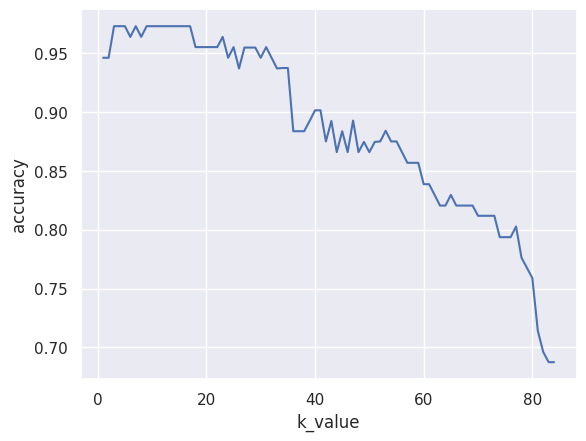

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

### Let's use the "correct value" of k

It will not always be the same, because cross-validation is randomized...

### We're ready to deploy our "final + best" predictive model!

In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):                 # to allow the input of any Model
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed for 2d
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!

[0.0,0.0,0.0,0.0],               # used as a separator here

[3.7, 2.8, 2.1, 0.3 ],   # let's use this for our own "new" iris ...
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name} ")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa 
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor 
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica 
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa 
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa 
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor 
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor 
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica 
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor 
from the features [0.0, 0.0, 0.0, 0.0] I predict setosa 
from the features [3.7, 2.8, 2.1, 0.3] I predict setosa 


### Predictive models aren't perfect!
+ Notice that the last prediction above the [0,0,0,0] is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

In [ ]:
#
# That's it!  Welcome to the world of model-building workflows!!
#
#             Our prediction?  We'll be back for more ML!
#
# In fact, the rest of the hw is to run more ML workflows:
# Births, Digits, another dataset, which could be Titanic, Housing, ...
#
# and more ML algorithms:
# Decision Trees, Random Forests, Neural Nets
# and, optionally, time series, recommendation systems, ...

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = knn_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


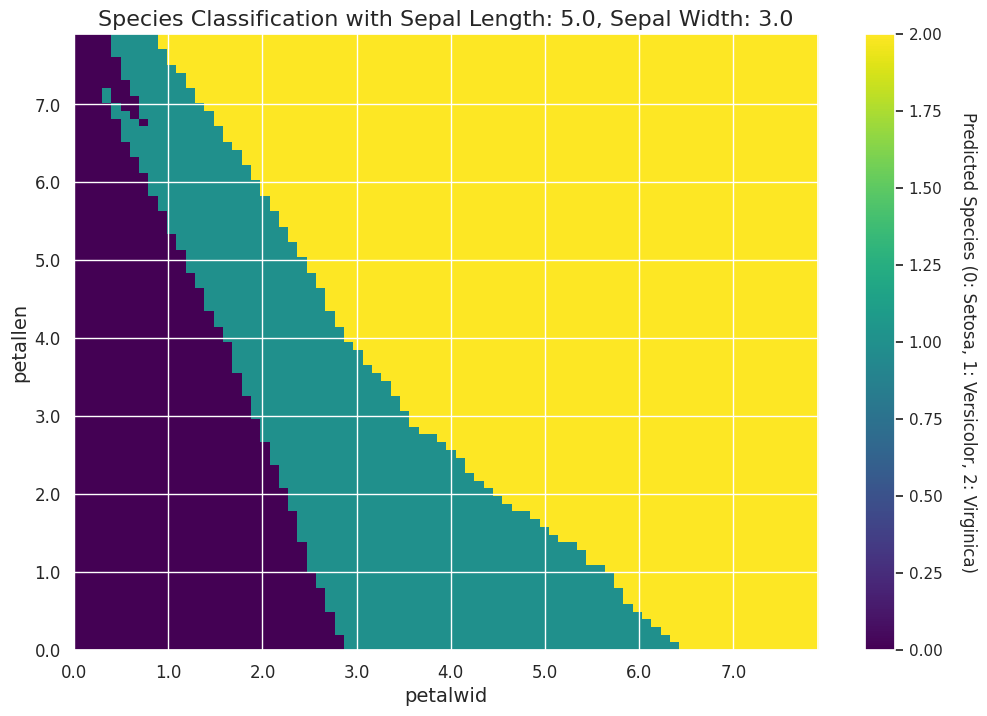

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
# Assuming 'PLANE', 'VERTICAL', and 'HORIZONT' are defined as in the original code

# Create a new figure and axes
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels


# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

# Set the title
ax.set_title(f"Species Classification with Sepal Length: {sepallen}, Sepal Width: {sepalwid}", fontsize=16)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

We've done it!

Remember that the model _thinks_ it knows everything...

But it's way too confident! &nbsp;&nbsp; (This seems like an AI theme...)

<br>
<hr>
<br>

# Your tasks!

Based on the examples above, your task is to build a kNN model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃

# **Part 1: the births dataset**

Test Set Accuracy (k=10): 0.8082191780821918


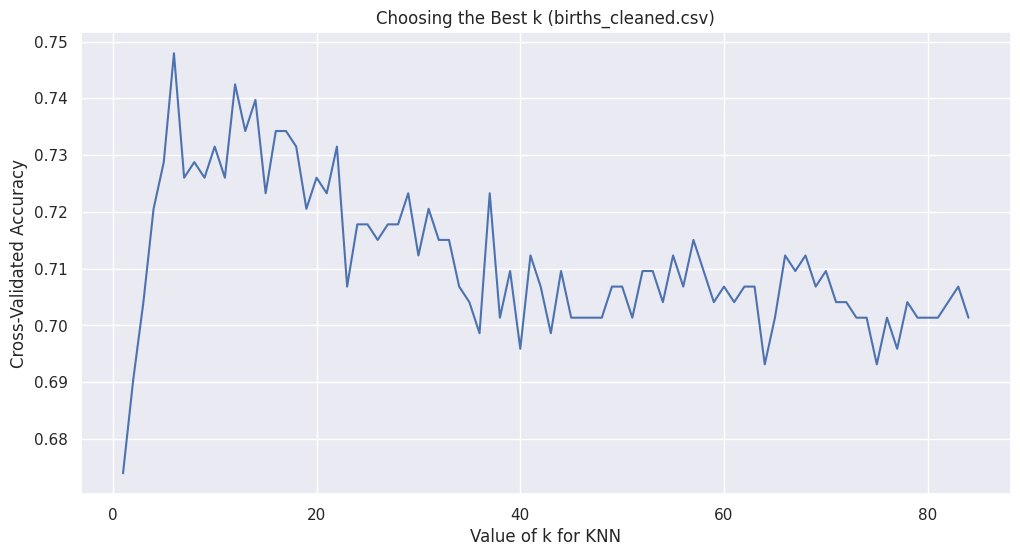

Best k value: 6
Final Test Set Accuracy (best k): 0.821917808219178


In [ ]:

# --- Import libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the dataset ---
births = pd.read_csv('./births_cleaned.csv')

# --- Define features and target ---
X_all = births[['month', 'day']]
y_all = births['popularity']

# --- Convert to numpy arrays ---
A = X_all.to_numpy().astype('float64')
labels = y_all.to_numpy()

# --- Split into train and test sets (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(A, labels, test_size=0.2, random_state=42)

# --- Create and train initial kNN model (k=10 as starting point) ---
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# --- Evaluate on test set ---
accuracy_test = knn.score(X_test, y_test)
print("Test Set Accuracy (k=10):", accuracy_test)

# --- Cross-validation to find the best k value ---
k_range = range(1, 85)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, A, labels, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# --- Plot accuracy vs. k ---
plt.figure(figsize=(12,6))
sns.lineplot(x=list(k_range), y=k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the Best k (births_cleaned.csv)')
plt.grid(True)
plt.show()

# --- Find best k ---
best_k = np.argmax(k_scores) + 1  # +1 because Python starts at 0
print("Best k value:", best_k)

# --- Train final kNN model using best k ---
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
final_accuracy = knn_final.score(X_test, y_test)
print("Final Test Set Accuracy (best k):", final_accuracy)


The final test set accuracy using this best k was approximately 82.12%. The predictors (month and day) may not have a very strong or direct relationship to the popularity (above or below the median). Days in different months can have very similar popularity outcomes, making it harder for kNN to distinguish between classes based only on proximity in (month, day) space.

# **Part 2: the digits dataset**

Test Set Accuracy (k=10): 0.9830508474576272


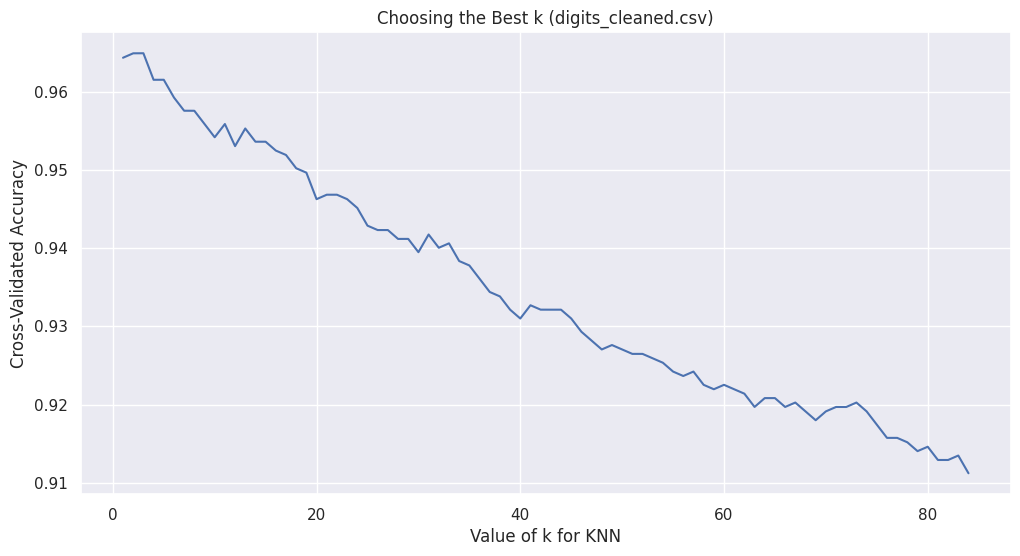

Best k value: 3
Final Test Set Accuracy (best k): 0.9915254237288136


In [ ]:


# --- Import libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the dataset ---
digits = pd.read_csv('./digits_cleaned.csv')

# --- Define features and target ---
X_all = digits.drop('actual_digit', axis=1)
y_all = digits['actual_digit']

# --- Convert to numpy arrays ---
A = X_all.to_numpy().astype('float64')
labels = y_all.to_numpy()

# --- Split into train and test sets (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(A, labels, test_size=0.2, random_state=42)

# --- Create and train initial kNN model (k=10 as starting point) ---
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# --- Evaluate on test set ---
accuracy_test = knn.score(X_test, y_test)
print("Test Set Accuracy (k=10):", accuracy_test)

# --- Cross-validation to find the best k value ---
k_range = range(1, 85)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, A, labels, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# --- Plot accuracy vs. k ---
plt.figure(figsize=(12,6))
sns.lineplot(x=list(k_range), y=k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the Best k (digits_cleaned.csv)')
plt.grid(True)
plt.show()

# --- Find best k ---
best_k = np.argmax(k_scores) + 1  # +1 because Python starts at 0
print("Best k value:", best_k)

# --- Train final kNN model using best k ---
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
final_accuracy = knn_final.score(X_test, y_test)
print("Final Test Set Accuracy (best k):", final_accuracy)


The model achieved over 99% accuracy, showing that just looking at a few similar examples (with k=3) is enough to make excellent predictions. As k increases, the model gets slightly worse, but stays very strong overall. This shows the dataset is very well-behaved for kNN. Therefore, kNN is an almost perfect fit for this dataset because digit patterns are very visual, repetitive, and clearly grouped in feature space. That's why kNN struggled a little more with births (accuracy ~82%) but excelled with digits (accuracy ~99%).